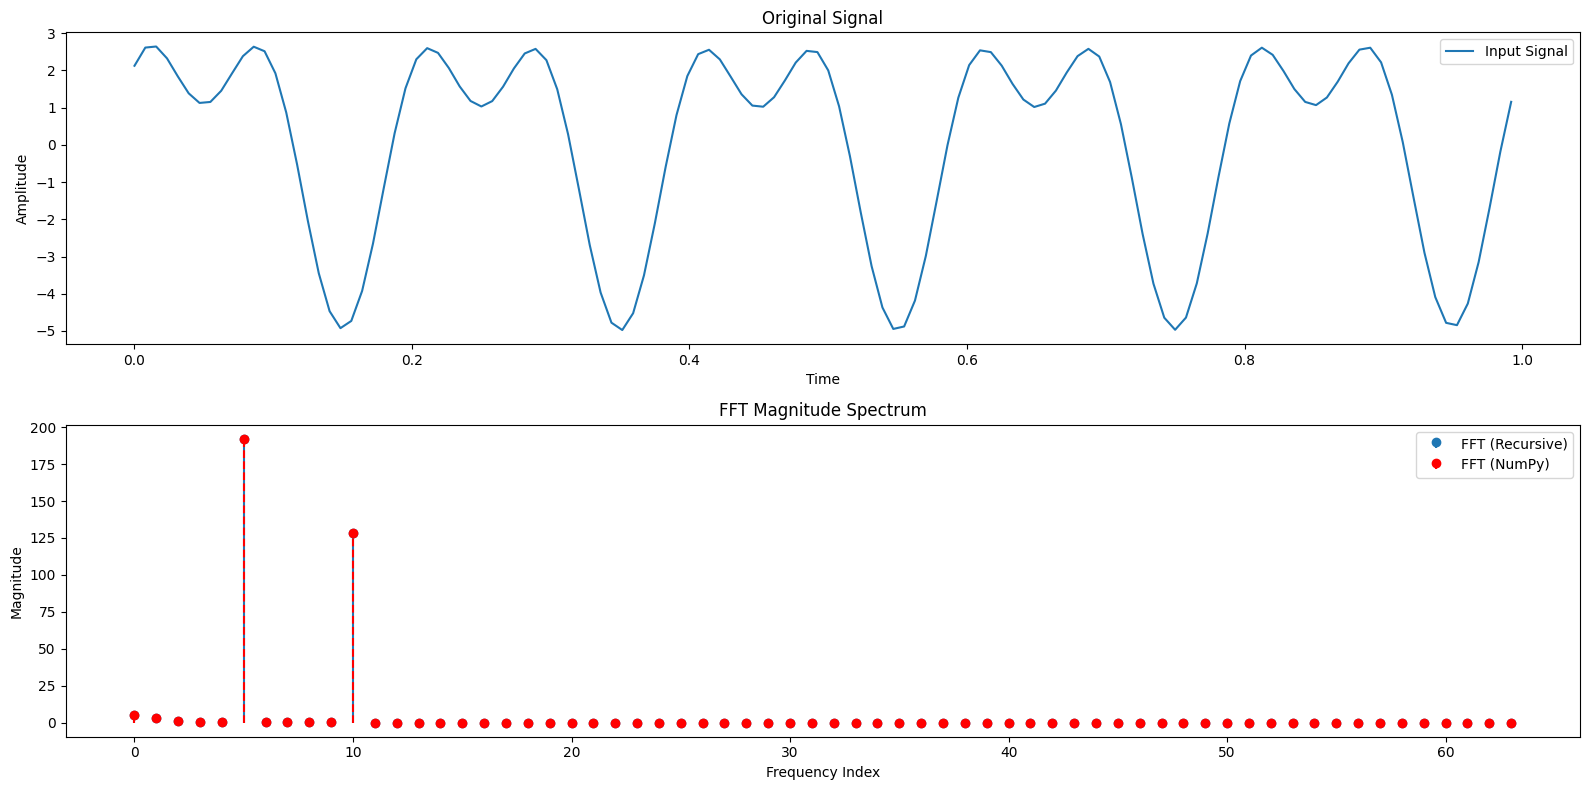

In [1]:
 import numpy as np
import matplotlib.pyplot as plt

def fft_recursive(x):
    """
    A simple recursive implementation of the FFT algorithm.
    x: Input array of complex numbers (length must be a power of 2)
    """
    N = len(x)
    if N <= 1:
        return x  # Base case: a single element is its own FFT

    # Split the input array into even and odd indexed elements
    even = fft_recursive(x[0::2])
    odd = fft_recursive(x[1::2])

    # Combine results using the FFT formula
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + \
           [even[k] - T[k] for k in range(N // 2)]

# Generate a sample signal
N = 128  # Length of the signal (must be a power of 2)
t = np.linspace(0, 1, N, endpoint=False)  # Time vector

# Create a complex signal combining a sine wave, a cosine wave, and a polynomial
signal = (
    3 * np.sin(2 * np.pi * 5 * t) +  # Sine wave at 5 Hz
    2 * np.cos(2 * np.pi * 10 * t) +  # Cosine wave at 10 Hz
    0.5 * (t - 0.5) ** 2  # Polynomial component
)

# Perform FFT using our recursive implementation
fft_result = fft_recursive(signal)  # This is a list
fft_result = np.array(fft_result)   # Convert the result to a NumPy array

# Use numpy's FFT for verification
fft_numpy = np.fft.fft(signal)

# Plot the original signal and FFT results
plt.figure(figsize=(16, 8))

# Plot the signal
plt.subplot(2, 1, 1)
plt.plot(t, signal, label="Input Signal")
plt.title("Original Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

# Plot FFT magnitude spectrum
plt.subplot(2, 1, 2)
plt.stem(np.arange(N // 2), np.abs(fft_result[:N // 2]), basefmt=" ", label="FFT (Recursive)")
plt.stem(np.arange(N // 2), np.abs(fft_numpy[:N // 2]), markerfmt='ro', basefmt=" ", label="FFT (NumPy)", linefmt="r--")
plt.title("FFT Magnitude Spectrum")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitude")
plt.legend()

plt.tight_layout()
plt.show()